C:\Users\ho.plebair\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


170498071/170498071 [==============================] - 135s 1us/step


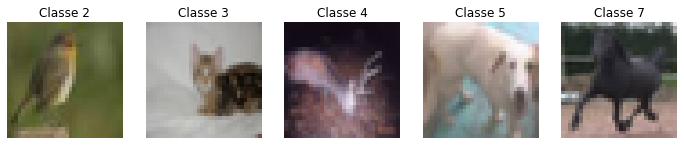

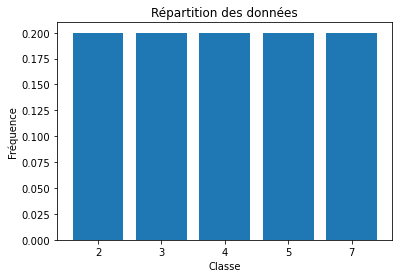

Epoch 1/10
625/625 [==============================] - 7s 9ms/step - loss: 1.5496 - accuracy: 0.4099 - val_loss: 1.4271 - val_accuracy: 0.4268
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 1.3023 - accuracy: 0.4609 - val_loss: 1.4274 - val_accuracy: 0.4108
Epoch 3/10
625/625 [==============================] - 6s 9ms/step - loss: 1.2579 - accuracy: 0.4805 - val_loss: 1.3800 - val_accuracy: 0.4222
Epoch 4/10
625/625 [==============================] - 5s 9ms/step - loss: 1.2348 - accuracy: 0.4919 - val_loss: 1.3128 - val_accuracy: 0.4646
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 1.2216 - accuracy: 0.4998 - val_loss: 1.4552 - val_accuracy: 0.4118
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 1.2001 - accuracy: 0.5072 - val_loss: 1.4321 - val_accuracy: 0.4330
Epoch 7/10
625/625 [==============================] - 5s 9ms/step - loss: 1.1811 - accuracy: 0.5196 - val_loss: 1.3556 - val_accuracy: 0.4358
Epoch 

C:\Users\ho.plebair\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ho.plebair\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ho.plebair\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ho.plebair\Anaconda3\lib\site-p

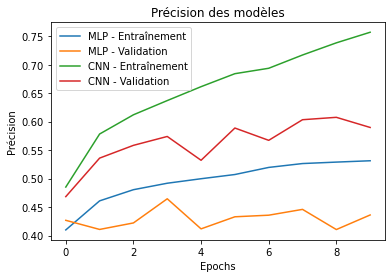

Epoch 1/10
625/625 [==============================] - 14s 21ms/step - loss: 1.4404 - accuracy: 0.4593 - val_loss: 1.1524 - val_accuracy: 0.5370
Epoch 2/10
625/625 [==============================] - 13s 20ms/step - loss: 1.1572 - accuracy: 0.5431 - val_loss: 1.1329 - val_accuracy: 0.5428
Epoch 3/10
625/625 [==============================] - 13s 20ms/step - loss: 1.0926 - accuracy: 0.5685 - val_loss: 1.0725 - val_accuracy: 0.5704
Epoch 4/10
625/625 [==============================] - 13s 20ms/step - loss: 1.0542 - accuracy: 0.5849 - val_loss: 1.0489 - val_accuracy: 0.5920
Epoch 5/10
625/625 [==============================] - 13s 20ms/step - loss: 1.0208 - accuracy: 0.5985 - val_loss: 1.0935 - val_accuracy: 0.5656
Epoch 6/10
625/625 [==============================] - 13s 20ms/step - loss: 0.9775 - accuracy: 0.6176 - val_loss: 1.0632 - val_accuracy: 0.5904
Epoch 7/10
625/625 [==============================] - 13s 20ms/step - loss: 0.9534 - accuracy: 0.6269 - val_loss: 1.0072 - val_accuracy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Récupération du dataset CIFAR-10
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Filtre les données pour garder seulement les images d'animaux
animal_classes = [2, 3, 4, 5, 7]
animal_indices = np.isin(y_train_full, animal_classes).flatten()
X_train_filtered = X_train_full[animal_indices]
y_train_filtered = y_train_full[animal_indices]

# Affiche une image par classe dans le Notebook
fig, axs = plt.subplots(1, len(animal_classes), figsize=(12, 3))
for i, animal_class in enumerate(animal_classes):
    class_indices = np.where(y_train_filtered == animal_class)[0]
    random_index = np.random.choice(class_indices)
    axs[i].imshow(X_train_filtered[random_index])
    axs[i].set_title(f"Classe {animal_class}")
    axs[i].axis("off")
plt.show()

# Analyse exploratoire du dataset
class_counts = np.unique(y_train_filtered, return_counts=True)
class_labels = [str(label) for label in class_counts[0]]
class_frequencies = class_counts[1] / len(y_train_filtered)

plt.bar(class_labels, class_frequencies)
plt.xlabel("Classe")
plt.ylabel("Fréquence")
plt.title("Répartition des données")
plt.show()

# Séparation des données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_filtered, y_train_filtered, test_size=0.2, random_state=42)

# Prétraitement des données
X_train = X_train.astype("float32") / 255.0
X_val = X_val.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Construction du modèle MLP
mlp_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

# Compilation et entraînement du modèle MLP
mlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Construction du modèle CNN
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

# Compilation et entraînement du modèle CNN
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Évaluation des modèles sur les ensembles de validation et de test
mlp_val_loss, mlp_val_accuracy = mlp_model.evaluate(X_val, y_val)
mlp_test_loss, mlp_test_accuracy = mlp_model.evaluate(X_test, y_test)
cnn_val_loss, cnn_val_accuracy = cnn_model.evaluate(X_val, y_val)
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(X_test, y_test)

# Rapport de classification pour les modèles MLP et CNN
mlp_pred = np.argmax(mlp_model.predict(X_test), axis=-1)
cnn_pred = np.argmax(cnn_model.predict(X_test), axis=-1)

mlp_classification_report = classification_report(y_test, mlp_pred)
cnn_classification_report = classification_report(y_test, cnn_pred)

print("Rapport de classification MLP :")
print(mlp_classification_report)
print("-----------------------------------------")
print("Rapport de classification CNN :")
print(cnn_classification_report)

# Matrice de confusion pour les modèles MLP et CNN
mlp_confusion_matrix = confusion_matrix(y_test, mlp_pred)
cnn_confusion_matrix = confusion_matrix(y_test, cnn_pred)

print("Matrice de confusion MLP :")
print(mlp_confusion_matrix)
print("-----------------------------------------")
print("Matrice de confusion CNN :")
print(cnn_confusion_matrix)

# Visualisation des performances des modèles
plt.plot(mlp_history.history["accuracy"], label="MLP - Entraînement")
plt.plot(mlp_history.history["val_accuracy"], label="MLP - Validation")
plt.plot(cnn_history.history["accuracy"], label="CNN - Entraînement")
plt.plot(cnn_history.history["val_accuracy"], label="CNN - Validation")
plt.title("Précision des modèles")
plt.xlabel("Epochs")
plt.ylabel("Précision")
plt.legend()
plt.show()

# Remédier à l'overfitting en utilisant le dropout et l'early stopping
dropout_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

early_stopping = keras.callbacks.EarlyStopping(patience=3)

dropout_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
dropout_history = dropout_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Évaluation du modèle avec dropout sur les ensembles de test
dropout_val_loss, dropout_val_accuracy = dropout_model.evaluate(X_val, y_val)
dropout_test_loss,dropout_test_accuracy = dropout_model.evaluate(X_test, y_test)

# Conclusion sur les résultats obtenus
print("Précision du modèle MLP sur l'ensemble de validation :", mlp_val_accuracy)
print("Précision du modèle MLP sur l'ensemble de test :", mlp_test_accuracy)
print("Précision du modèle CNN sur l'ensemble de validation :", cnn_val_accuracy)
print("Précision du modèle CNN sur l'ensemble de test :", cnn_test_accuracy)
print("Précision du modèle avec dropout sur l'ensemble de validation :", dropout_val_accuracy)
print("Précision du modèle avec dropout sur l'ensemble de test :", dropout_test_accuracy)
